In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
messages=pd.read_csv(r"C:\Users\vaibhav\Downloads\spam.csv",encoding='cp1252')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
messages.shape

(6776, 5)

In [4]:
messages=messages.iloc[:,[0,1]]    #remove the extra not needed columns

In [5]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#lets rename the columns
messages.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [7]:
#remove the stopwords and punctuations from the message column
#build the wordcloud

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
messages.label.replace( {'ham':0 , 'spam':1},inplace=True )

In [10]:
messages.message=messages.message.str.lower()

In [11]:
def text_process(mess):
    """
    1.remove the punctuation
    2.remove the stopwords
    3.return the list of clean textwords
    """
    
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [12]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
6       [even, brother, like, speak, treat, like, aids...
7       [per, request, melle, melle, oru, minnaminungi...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, u, r, entitled, update, l...
10      [im, gonna, home, soon, dont, want, talk, stuf...
11      [six, chances, win, cash, 100, 20000, pounds, ...
12      [urgent, 1, week, free, membership, å£100000, ...
13      [ive, searching, right, words, thank, breather...
14                                         [date, sunday]
15      [xxxmobilemovieclub, use, credit, click, wap, ...
16                                    [oh, kim, watching]
17      [eh, u

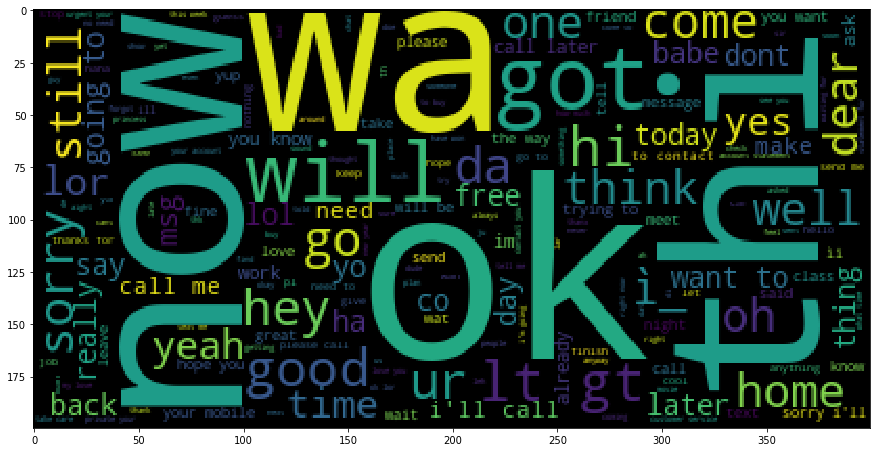

In [13]:
from wordcloud import WordCloud
WordCloud
plt.figure(figsize=(15,15))
cloud=WordCloud().generate(str(messages['message']))
plt.imshow(cloud)

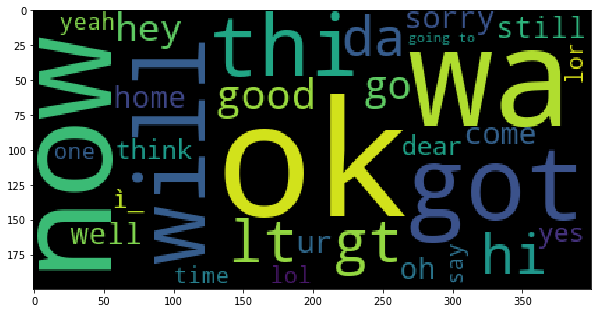

In [14]:
df_ham=messages[messages.label==0]
df_ham.head()

plt.figure(figsize=(10,10))
cloud=WordCloud(max_words=30).generate(str(df_ham['message']) )

plt.imshow(cloud)

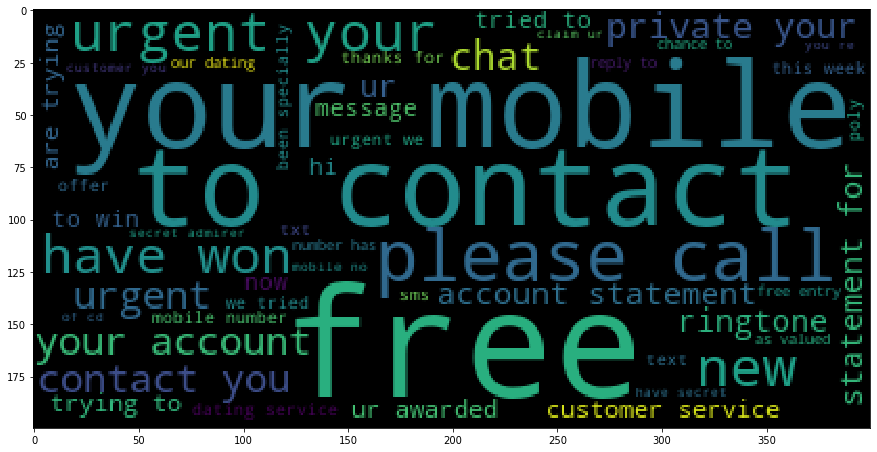

In [15]:
df_spam=messages[messages.label==1]
df_spam.head()

wc=WordCloud(max_words=50)
cloud=wc.generate(str(df_spam.message))
fig=plt.figure(figsize=(15,15))

plt.imshow(cloud)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer will give the count of each and every word

bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

9422


In [17]:
messages_bow=bow_transformer.transform(messages.message)    #TDM

In [18]:
messages_bow.shape

(6776, 9422)

In [19]:
#bow_transformer.vocabulary_

In [20]:
messages_bow

<6776x9422 sparse matrix of type '<class 'numpy.int64'>'
	with 60614 stored elements in Compressed Sparse Row format>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(messages_bow,
                                              messages.label,
                                              test_size=.2,
                                              random_state=101)

In [22]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
from sklearn.metrics import confusion_matrix

In [23]:
naive_bayes.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
pred=naive_bayes.predict(x_test)

In [25]:
tab1=confusion_matrix(pred,y_test)
tab1

array([[1161,    6],
       [  17,  172]], dtype=int64)

In [26]:
acc=tab1.diagonal().sum()* 100 / tab1.sum()
acc

98.30383480825958